In [2]:
import mne
import numpy as np
import os.path as op
import matplotlib.pyplot as plt

from pactools import simulate_pac, raw_to_mask, Comodulogram, MaskIterator

In [14]:
n_events = 100
mu = 1.  # mean onset of PAC in seconds
sigma = 0.25  # standard deviation of onset of PAC in seconds
trial_len = 0.1  # len of the simulated trial in seconds
first_samp = 5  # seconds before the first sample and after the last

fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 3.0  # Hz
low_fq_width = 2.0  # Hz

n_points = int(trial_len * fs)
noise_level = 0.4


def gaussian1d(array, mu, sigma):
    return np.exp(-0.5 * ((array - mu) / sigma) ** 2)


# leave one channel for events and make signal as long as events
# with a bit of room on either side so events don't get cut off
signal = np.zeros((2, int(n_points * n_events + 2 * first_samp * fs)))
events = np.zeros((n_events, 3), dtype=int)
events[:, 0] = np.arange((first_samp + mu) * fs,
                         n_points * n_events + (first_samp + mu) * fs,
                         trial_len * fs, dtype=int)
events[:, 2] = np.ones((n_events))
mod_fun = gaussian1d(np.arange(n_points), mu * fs, sigma * fs)
data = list()
for i in range(n_events):
    signal_no_pac = simulate_pac(n_points=n_points, fs=fs,
                                 high_fq=high_fq, low_fq=low_fq,
                                 low_fq_width=low_fq_width,
                                 noise_level=1.0, random_state=i)
    signal_pac = simulate_pac(n_points=n_points, fs=fs,
                              high_fq=high_fq, low_fq=low_fq,
                              low_fq_width=low_fq_width,
                              noise_level=noise_level, random_state=i)

    data.append(
        signal_pac * mod_fun + signal_no_pac * (1 - mod_fun)
    )

data = np.stack(data)

In [15]:
data.shape

(100, 20)

[........................................] 100% | 0.61 sec | comodulogram: DAR(10, 1) 
[........................................] 100% | 0.61 sec | comodulogram: DAR(10, 1) 

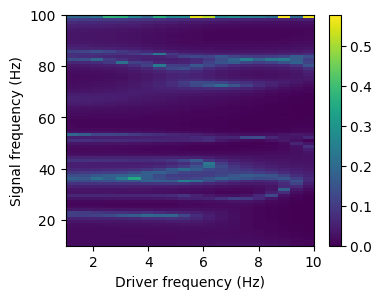

In [16]:
%matplotlib inline
# create the instance of Comodulogram
estimator = Comodulogram(
    fs=200,
    low_fq_range=np.linspace(1, 10, 20), low_fq_width=2.,
    method='duprelatour', progress_bar=True
)
# compute the comodulogram
estimator.fit(
    data,
    data,
)
# plot the results
estimator.plot(tight_layout=False)
plt.show()

[........................................] 100% | 0.09 sec | comodulogram: DAR(10, 1) 
[........................................] 100% | 0.09 sec | comodulogram: DAR(10, 1) 

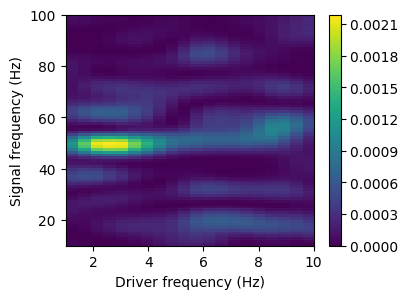

In [17]:
%matplotlib inline
# create the instance of Comodulogram
estimator = Comodulogram(
    fs=200,
    low_fq_range=np.linspace(1, 10, 20), low_fq_width=2.,
    method='duprelatour', progress_bar=True
)
# compute the comodulogram
data_flat = np.reshape(data, -1)[None, :]
estimator.fit(
    data_flat,
    data_flat,
)
# plot the results
estimator.plot(tight_layout=False)
plt.show()